In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os
import pandas as pd
from scipy.interpolate import interp1d

import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The starting date is: 
2022-04-19 00:00:00


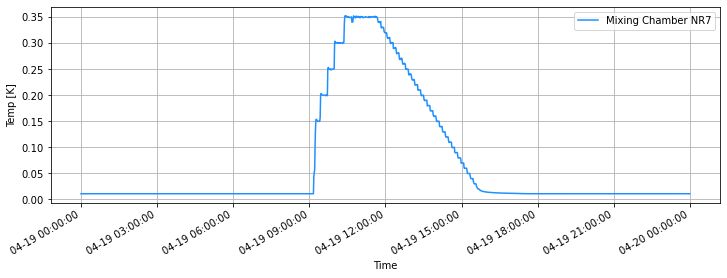

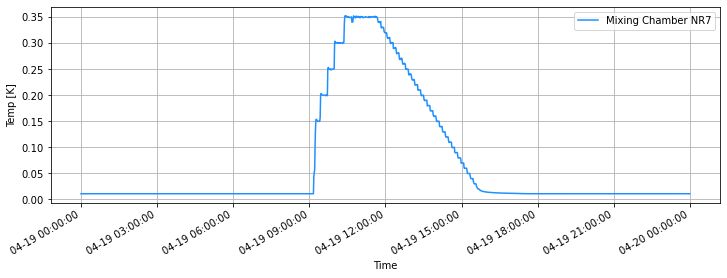

In [2]:
nf.poll_and_plot_MACRT("2022-04-19",1)

In [3]:
series    = nf.create_date_range("2022-04-19",1)
offset_0  = datetime.timedelta(days=0, hours=0, minutes=0)
offset_ls = datetime.timedelta(days=0, hours=-5, minutes=0)

The starting date is: 
2022-04-19 00:00:00


In [4]:
res_mc  = nf.read_MACRT_data(series, offset_0)
res_ls_ = nf.read_Lakeshore_data(series, offset_ls)
res_ls  = nf.select_Lakeshore_channel(res_ls_,2)

/home/nexus-admin/NEXUS_RF/DeviceControl/NEXUSFunctions.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Temperature'] = ch_temps


<IPython.core.display.Javascript object>


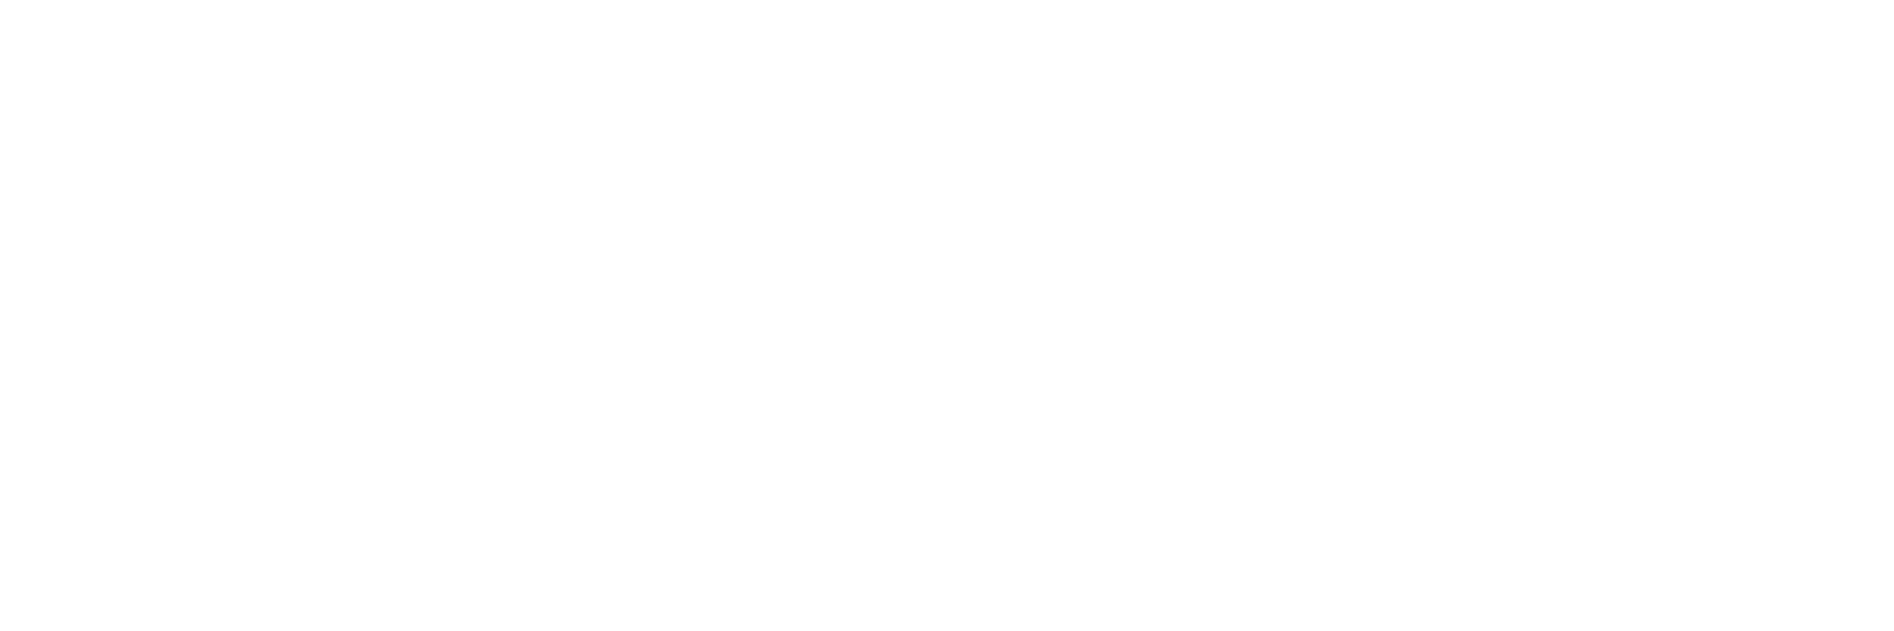

In [5]:
%matplotlib notebook
f = plt.figure(figsize = (12,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel('Temp [K]')

## Plot the MACRT data
a.plot(res_mc['ctime'], res_mc['MIXING CHAMB_Conv'], label='MACRT - MC', color='dodgerblue')

## Plot the Lakeshore data
a.plot(res_ls['ctime'], res_ls['Temperature'], label='Lakeshore - MC/RF', color='firebrick')

plt.grid()
plt.legend(loc="best")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)

In [6]:
t0 = datetime.datetime(2022,4,19,10,10,0)
t1 = datetime.datetime(2022,4,19,18,18,0)

mc_times = res_mc['ctime'].loc[(res_mc['ctime']>t0) & (res_mc['ctime']<t1)]
mc_temps = res_mc['MIXING CHAMB_Conv'].loc[(res_mc['ctime']>t0) & (res_mc['ctime']<t1)]

mc_timestamps = [time.mktime(d.timetuple()) for d in mc_times]
mc_interp = interp1d(mc_timestamps, mc_temps, bounds_error=False, fill_value='extrapolate')

ls_times = res_ls['ctime'].loc[(res_ls['ctime']>t0) & (res_ls['ctime']<t1)]
ls_temps = res_ls['Temperature'].loc[(res_ls['ctime']>t0) & (res_ls['ctime']<t1)]

ls_timestamps = [time.mktime(d.timetuple()) for d in ls_times]
print(len(ls_temps),len(ls_timestamps))
delta = ls_temps - mc_interp(ls_timestamps)
print(len(delta))

1037 1037
1037


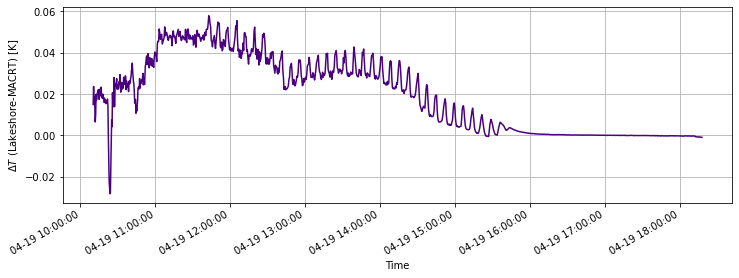

In [7]:
%matplotlib inline
f = plt.figure(figsize = (12,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel(r'$\Delta T$ (Lakeshore-MACRT) [K]')

## Plot the MACRT data
a.plot(ls_times, delta, color='indigo')

plt.grid()
# plt.legend(loc="best")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)

In [8]:
def cleaner(strng):
    return float(strng.split(" ")[0])

<IPython.core.display.Javascript object>


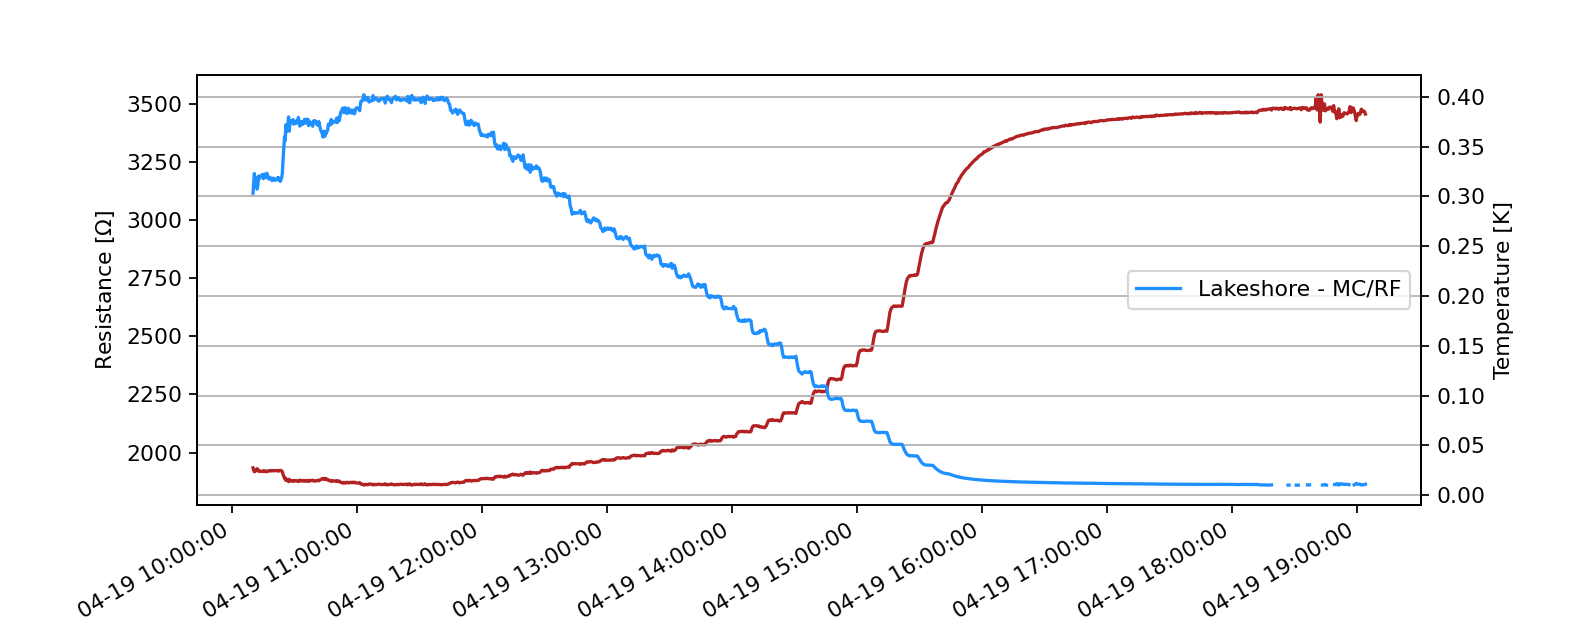

In [12]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel(r'Resistance [$\Omega$]')

# ## Plot the MACRT data
# a.plot(res_mc['ctime'], res_mc['MIXING CHAMB_Conv'], label='MACRT - MC', color='dodgerblue')

## Plot the Lakeshore data
a.plot(res_ls['ctime'], res_ls['Resistance'].apply(cleaner), label='Resistance - MC/RF', color='firebrick')

b = a.twinx()
b.plot(res_ls['ctime'], res_ls['Temperature'], label='Lakeshore - MC/RF', color='dodgerblue')
b.set_ylabel("Temperature [K]")

plt.grid()
plt.legend(loc="right")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)